# ![.right](https://lh6.ggpht.com/wUrTIhpHPVqw_VPCdhbSiF5TXlBlLyRHdH1gsII_y5NkgYKzbbj7cC2l6AGoVq-JN0U=w100 "MSDS 7331 Data Mining - Project 1")


# Project 3: BEER ME! 

### a recommendation system for those who are thirsty but don't know it yet!

---



# Team Members

- Chris Woodard
- Claire Chu
- Nathan Mowat
- Bill Kerneckel

---


# Rubic

- [Business Understanding](#bu) 

- [Data Understanding 1](#du1)

- [Data Understanding 2](#du2)

- [Modeling and Evaluation 1](#me1)

- [Modeling and Evaluation 2](#me2)

- [Modeling and Evaluation 3](#me3)

- [Modeling and Evaluation 4](#me4)

- [Deployment](#d)

- [Exceptional Work](#ew)

- [Appendix](#a)

<hr>



# OBJECTIVE: 
We found a comprehensive list of beer reviews from  http://Beeradvocate.com and http://ratebeer.com. We want to use these reviews to generate a recommendation system that will suggest potential beers that a user might like based on their previous beer ratings and reviews:
- Establish a solid distance metric to determine the similiarity amongst different users
- Utilize this metric to recommend other beers that a user might like

We hope that the collaborative filtering on a recommendation system completed in this notebook will help make beer drinkers thirsty for beers they have not tried yet.

source: https://data.world/socialmediadata/beeradvocate

source: http://nbviewer.jupyter.org/gist/glamp/20a18d52c539b87de2af

source: https://snap.stanford.edu/data/web-BeerAdvocate.html

source: https://github.com/yhat/Beer-Rec-Flask/blob/master/README.md

# <a name="bu"></a>Business Understanding

---

<span style="color:red">10 Points - Describe the purpose of the data set you selected (i.e., why was this data collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific dataset and the stakeholders needs?</span>

This data was collected from http://Beeradvocate.com and http://ratebeer.com from January 1998 - November 2011. Both websites are used by beer drinkers to not only stay informed about the latest in beer news, but to also track and review the beers each user has tried. As an avid beer drinker myself, these websites are useful to me in that they help me avoid re-ordering beers i've previously tried and did not like. This helps me save money and stomach space when i'm ordering drinks at the bar. The overall review rating consists of a 1-5 (1, being the worst, and five being the best) ranking that is comprised of aroma, appearance, mouthfeel, and taste ratings (also 1-5).

The dataset we are analyzing has a total of 13 columns including: 

|     Column Name    | Column Type | Description             | Example                     |
|:------------------:|:-----------:|:-----------------------:|:---------------------------:|
| brewery_id         | float8      | Brewery Id                   | float8             |
| brewery_name       | varchar     | Brewery Name                 | Red Moon           |
| review_time        | numeric     | Review Time                  | 1293735206         |
| review_overall     | float8      | Overall Review Rating        | 3                  |
| review_aroma       | float8      | Review of Aroma              | 2.5                |
| review_appearance  | float8      | Review of Appearance         | 3                  |
| review_profilename | varchar     | Username of Reviewer         | stcules            |
| beer_style         | varchar     | Beer Style                   | English Strong Ale |
| review_palate      | float8      | Review Palate                | 3                  |
| review_taste       | float8      | Review Taste                 | 3                  |
| beer_name          | varchar     | Beer Name                    | Red Moon           |
| beer_abv           | float8      | Alcohol Percentage by Volume | 6.2                |
| beer_beerid        | flaot8      | Beer Id                      | 48213              |


The best case scenario will produce a model that is able to suggest a beer that a user will drink and rate at least a 4 or above in their overall rating (we chose 4 because this is the median review rating). 

Statistically, we will compare amongst the models RMSE and Precision/recall metrics, choosing the model with the lowest scores for both. A good algorithm will have a low RMSE meaning that the predicted rating is very close to the actual rating for each beer. A good algorithem will also have a low average precision/recall score meaning that when the model predicted a positive rating, the actual rating was positive almost all of the time and that when the model predicted a negative rating, the actual rating was negative almost all of the time.

# <a name="du1"></a> Data Understanding

---

<span style="color:red"> 10 Points - Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file. Verify data quality: Are there missing values? Duplicate data? Outliers? Are those mistakes? How do you deal with these problems?</span>

Insert content here!.......

In [85]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
#load python libaries
import numpy as np
import pandas as pd
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as pl
import seaborn as sns
import glob
import sys
import os
import warnings
import ggplot
import datetime
import time
from datetime import date

In [2]:
%matplotlib inline

In [3]:
#load data file
beerDF = pd.read_csv('beer_reviews.csv') 

#you'll have to change the file path to your working directory


In [5]:
beerDF.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [6]:
summary = beerDF.describe()
summary = summary.transpose()
summary

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586614.0,3.130099e+03,5.578104e+03,1.000000e+00,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586614.0,1.224089e+09,7.654427e+07,8.406720e+08,1.173224e+09,1.239203e+09,1.288568e+09,1.326285e+09
review_overall,1586614.0,3.815581e+00,7.206219e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586614.0,3.735636e+00,6.976167e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586614.0,3.841642e+00,6.160928e-01,0.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586614.0,3.743701e+00,6.822184e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586614.0,3.792860e+00,7.319696e-01,1.000000e+00,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_abv,1518829.0,7.042387e+00,2.322526e+00,1.000000e-02,5.200000e+00,6.500000e+00,8.500000e+00,5.770000e+01
beer_beerid,1586614.0,2.171279e+04,2.181834e+04,3.000000e+00,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


In [7]:
#what is the most popular beer?
beerDF.beer_name.describe()

count           1586614
unique            56857
top       90 Minute IPA
freq               3290
Name: beer_name, dtype: object

In [75]:
#what are the top 10 most popular beers?
from collections import Counter
topbeer = Counter(beerDF.beer_name)
topbeer.most_common(10)

[('90 Minute IPA', 3290),
 ('India Pale Ale', 3130),
 ('Old Rasputin Russian Imperial Stout', 3111),
 ('Sierra Nevada Celebration Ale', 3000),
 ('Two Hearted Ale', 2728),
 ('Stone Ruination IPA', 2704),
 ('Arrogant Bastard Ale', 2704),
 ('Sierra Nevada Pale Ale', 2587),
 ('Stone IPA (India Pale Ale)', 2575),
 ('Pliny The Elder', 2527)]

In [157]:
#which reviewer has the most reviews?

toprevs = Counter(beerDF.review_profilename)
toprevs.most_common(100)

[('northyorksammy', 5817),
 ('BuckeyeNation', 4661),
 ('mikesgroove', 4617),
 ('Thorpe429', 3518),
 ('womencantsail', 3497),
 ('NeroFiddled', 3488),
 ('ChainGangGuy', 3471),
 ('brentk56', 3357),
 ('Phyl21ca', 3179),
 ('WesWes', 3168),
 ('oberon', 3128),
 ('feloniousmonk', 3080),
 ('akorsak', 3010),
 ('BEERchitect', 2946),
 ('Gueuzedude', 2938),
 ('jwc215', 2735),
 ('russpowell', 2696),
 ('TheManiacalOne', 2659),
 ('Gavage', 2630),
 ('zeff80', 2622),
 ('Mora2000', 2594),
 ('tempest', 2559),
 ('Wasatch', 2541),
 ('WVbeergeek', 2524),
 ('drabmuh', 2481),
 ('Halcyondays', 2457),
 ('weeare138', 2452),
 ('glid02', 2450),
 ('Viggo', 2433),
 ('ppoitras', 2426),
 ('jdhilt', 2422),
 ('barleywinefiend', 2396),
 ('Bighuge', 2376),
 ('Jason', 2349),
 ('wl0307', 2315),
 ('Gusler', 2297),
 ('emerge077', 2250),
 ('Billolick', 2238),
 ('smcolw', 2224),
 ('rhoadsrage', 2217),
 ('DrJay', 2202),
 ('Zorro', 2198),
 ('TMoney2591', 2169),
 ('MasterSki', 2156),
 ('Kegatron', 2150),
 ('Knapp85', 2143),
 ('Dogb

In [55]:
#investigate any NA
beerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 13 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_abv              1518829 non-null float64
beer_beerid           1586614 non-null int64
dtypes: float64(6), int64(3), object(4)
memory usage: 157.4+ MB


In [64]:
beerDF.brewery_name.isnull().sum().sum()

15

In [68]:
beerDF.review_profilename.isnull().sum().sum()

348

In [67]:
beerDF.beer_abv.isnull().sum().sum()

67785

The majority of our null values are in the "beer_abv" column, let's drop this column. If this recommendation system were to go into full scale production, we could replace the null values with the median abv of each style of beer. But, since we are limited in time and computing power, we will delete this column for now.

As our next highest amount of null values comes from the "review_profilename" column, we will need to delete the rows with no profilename. Filling all null values with the same entry would result in a faulty statistic result since each null entry was probably entered by different users. Since we want to try collaborative filtering based on user preferences, we will assume that a "null" entry in the profilename space is not useful. It seems like our best bet would be to delete these entries.

The column with the lowest number of null values is the "brewery_name" column. 

In [70]:
beerDF.drop('beer_abv', axis=1, inplace=True)
beerDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1586614 entries, 0 to 1586613
Data columns (total 12 columns):
brewery_id            1586614 non-null int64
brewery_name          1586599 non-null object
review_time           1586614 non-null int64
review_overall        1586614 non-null float64
review_aroma          1586614 non-null float64
review_appearance     1586614 non-null float64
review_profilename    1586266 non-null object
beer_style            1586614 non-null object
review_palate         1586614 non-null float64
review_taste          1586614 non-null float64
beer_name             1586614 non-null object
beer_beerid           1586614 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 145.3+ MB


In [71]:
beerDF2 = beerDF[beerDF.review_profilename.notnull()]
beerDF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586266 entries, 0 to 1586613
Data columns (total 12 columns):
brewery_id            1586266 non-null int64
brewery_name          1586251 non-null object
review_time           1586266 non-null int64
review_overall        1586266 non-null float64
review_aroma          1586266 non-null float64
review_appearance     1586266 non-null float64
review_profilename    1586266 non-null object
beer_style            1586266 non-null object
review_palate         1586266 non-null float64
review_taste          1586266 non-null float64
beer_name             1586266 non-null object
beer_beerid           1586266 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 157.3+ MB


In [72]:
beerDF3 = beerDF2[beerDF2.brewery_name.notnull()]
beerDF3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1586251 entries, 0 to 1586613
Data columns (total 12 columns):
brewery_id            1586251 non-null int64
brewery_name          1586251 non-null object
review_time           1586251 non-null int64
review_overall        1586251 non-null float64
review_aroma          1586251 non-null float64
review_appearance     1586251 non-null float64
review_profilename    1586251 non-null object
beer_style            1586251 non-null object
review_palate         1586251 non-null float64
review_taste          1586251 non-null float64
beer_name             1586251 non-null object
beer_beerid           1586251 non-null int64
dtypes: float64(5), int64(3), object(4)
memory usage: 157.3+ MB


In [73]:
#review our new dataset without any null values
summary3 = beerDF3.describe()
summary3 = summary3.transpose()
summary3

,count,mean,std,min,25%,50%,75%,max
brewery_id,1586251.0,3.130381e+03,5.578478e+03,1.0,1.430000e+02,4.290000e+02,2.372000e+03,2.800300e+04
review_time,1586251.0,1.224100e+09,7.654413e+07,840672001.0,1.173236e+09,1.239222e+09,1.288572e+09,1.326285e+09
review_overall,1586251.0,3.815632e+00,7.205920e-01,0.0,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
review_aroma,1586251.0,3.735688e+00,6.975649e-01,1.0,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_appearance,1586251.0,3.841677e+00,6.160621e-01,0.0,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_palate,1586251.0,3.743757e+00,6.821700e-01,1.0,3.500000e+00,4.000000e+00,4.000000e+00,5.000000e+00
review_taste,1586251.0,3.792925e+00,7.319083e-01,1.0,3.500000e+00,4.000000e+00,4.500000e+00,5.000000e+00
beer_beerid,1586251.0,2.171468e+04,2.181901e+04,3.0,1.717000e+03,1.390600e+04,3.944100e+04,7.731700e+04


## Extracting Reviews

In [76]:
#convert name of dataset from beerdf3 to beerdf
beerDF = beerDF3.copy()

In [77]:
beer_1, beer_2 = "90 Minute IPA", "India Pale Ale"

def get_beer_reviews(beer, common_users):
    mask = (beerDF.review_profilename.isin(common_users)) & (beerDF.beer_name==beer)
    reviews = beerDF[mask].sort('review_profilename')
    reviews = reviews[reviews.review_profilename.duplicated()==False]
    return reviews
beer_1_reviews = get_beer_reviews(beer_1, common_reviewers)
beer_2_reviews = get_beer_reviews(beer_2, common_reviewers)

cols = ['beer_name', 'review_profilename', 'review_overall', 'review_aroma', 'review_palate', 'review_taste']
beer_2_reviews[cols].head()

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,beer_name,review_profilename,review_overall,review_aroma,review_palate,review_taste
595646,India Pale Ale,1fastz28,3.5,4.0,3.5,3.0
212302,India Pale Ale,49degrees,3.5,3.0,3.0,3.5
1348197,India Pale Ale,99bottles,4.5,4.0,4.0,4.5
1406683,India Pale Ale,9InchNails,3.5,3.5,4.0,3.5
595971,India Pale Ale,ADR,4.0,3.5,3.5,3.0


After reviewing the dataset, we can see that there are a total of 1,586,251 complete rows of data comprised of 12 total columns. 

- brewery Id: numeric value representing brewery name, type int64 but nominal in nature
- brewery name: string representing brewery name, type object 
- review time: numeric timestamp repesenting time and date review was completed, type int 64 but with timescale
- overall review rating: categorical from 1-5 representing overall rating, type float64 
- review of aroma: categorical from 1-5 representing aroma rating, type float64 
- review of appearance: categorical from 1-5 representing appearance rating, type float64 
- username of reviewer: string representing user name, type object
- beer style: string representing style of beer, type object
- review palate: categorical from 1-5 representing mouthfeel rating, type float64 
- review taste: categorical from 1-5 representing taste rating, type float64 
- beer name: string representing name of beer given by brewery, type object
- beer ID: numeric value representing beer name, type int 64 but nominal in nature

Data quality was verified with the original dataset having 1,586,614 values including nulls. After removing the ABV column and eliminating rows with null values, we ended up with 1,586,251 total rows and 12 columns.

Looking at the summary of the data, it does not appear that there are any duplicates for the data as the system does not allow users to rate a beer more than once. We assume the proper application controls where inplaced preventing users not to enter more than one rating per beer. We can see that the average overall review rating was <strong>3.8</strong>. As mentioned earlier, we will round this value up to 4 and use this as our benchmark value to determine if our recommendation system is working. (After completing a review, suggested beers should be rated by the viewer at least 4 or higher)

source: https://www.beeradvocate.com/community/threads/how-to-review-a-beer.241156/

# <a name="du2"></a> Data Understanding 2

----


<span style="color:red">10 Points - Visualize the any important attributes appropriately. Important: Provide an interpretation for any charts or graphs.</span>

In [81]:
pd.crosstab(index=beerDF["review_overall"],columns="count") 

col_0,count
review_overall,
0.0,7
1.0,10954
1.5,12972
2.0,38206
2.5,58485
3.0,165582
3.5,301743
4.0,582683
4.5,324321


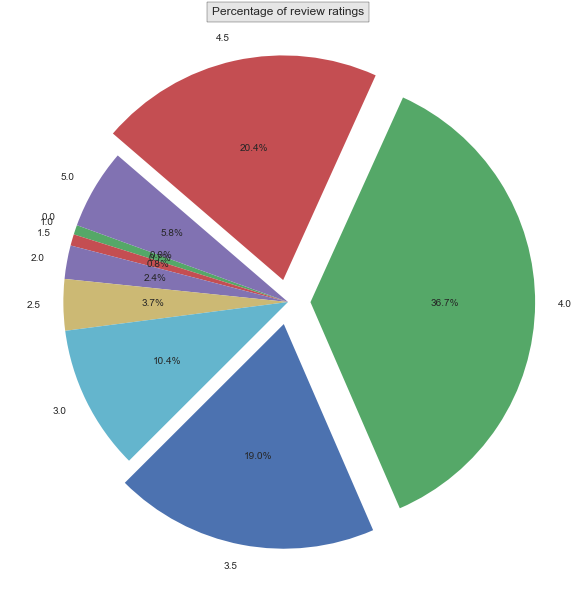

In [196]:
%matplotlib inline
# percentage of each review rating
from pylab import *
figure(1, figsize=(6,6))
ax = axes([0.2, 0.2, 1.3, 1.3])

# The slices will be ordered and plotted counter-clockwise.
labels = '0.0','1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5', '5.0'
fracs = [7, 10954, 12972, 38206, 58485, 165582, 301743, 582683, 324321, 91298]
explode = [0, 0, 0, 0, 0, 0, 0.1, 0.1, 0.1, 0]

pie(fracs, explode=explode, labels=labels,
                autopct='%1.1f%%', shadow=False, startangle=160)

title('Percentage of review ratings', bbox={'facecolor':'0.9', 'pad':5})

pl.show()

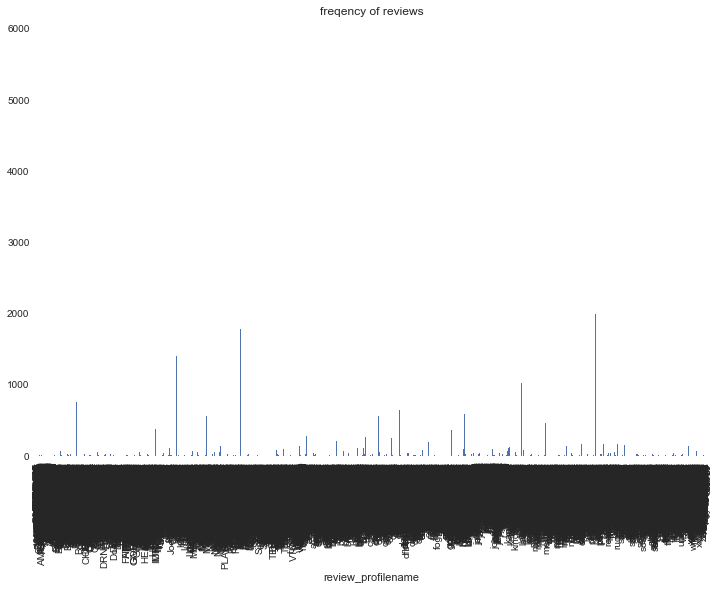

In [206]:
%matplotlib inline
usercount = beerDF.groupby(by='review_profilename')
usercount = usercount.size()
usercountplot = usercount.plot(kind='bar', title='freqency of reviews',) #bar chart
usercountplot

F = gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)

pl.show()

In [202]:
toprevs.most_common(10)

[('northyorksammy', 5817),
 ('BuckeyeNation', 4661),
 ('mikesgroove', 4617),
 ('Thorpe429', 3518),
 ('womencantsail', 3497),
 ('NeroFiddled', 3488),
 ('ChainGangGuy', 3471),
 ('brentk56', 3357),
 ('Phyl21ca', 3179),
 ('WesWes', 3168)]

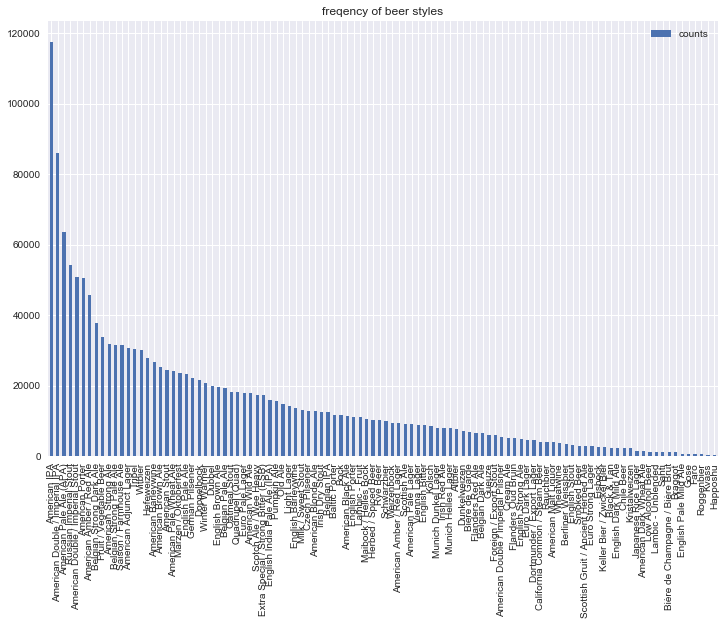

In [205]:
%matplotlib inline
stylecount = beerDF['beer_style'].value_counts().to_frame()
stylecount = stylecount.rename(columns= {'beer_style':'counts'})
stylecountplot = stylecount.plot(kind='bar', title='freqency of beer styles',)
stylecountplot

F = gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*2, Size[1]*2, forward=True)

pl.show()

In [203]:
topbeer.most_common(10)

[('90 Minute IPA', 3290),
 ('India Pale Ale', 3130),
 ('Old Rasputin Russian Imperial Stout', 3111),
 ('Sierra Nevada Celebration Ale', 3000),
 ('Two Hearted Ale', 2728),
 ('Stone Ruination IPA', 2704),
 ('Arrogant Bastard Ale', 2704),
 ('Sierra Nevada Pale Ale', 2587),
 ('Stone IPA (India Pale Ale)', 2575),
 ('Pliny The Elder', 2527)]

Looking at the output above, we can see a majority of the reviews consist of 3.5, 4.0, and 4.5 ratings. This makes sense since we foudn the average rating above to be a 3.8. 
Based on the frequency of reviews, we can see that the number of reviews people leave varies from almost 6000 reviews to 1 review. This is important to note because we will need to take this into account when we evaluate our user based recommendation system. 
Reviewing the different types of beer styles, we can see that the most popular beer style is "American IPA". This makes sense since looking at the top 10 most reviewed beers. Of the ten listed, 5 of them are in the "IPA" style category. 

# <a name="me1"></a> Modeling and Evaluation 1
---

<span style="color:red">10 Points - Train and adjust parameters</span>

We used this section as a proof of concept to test our theory on a subset of the beer data.

## Calculate Euclidean Distances 

In [86]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances
from scipy.stats.stats import pearsonr


ALL_FEATURES = ['review_overall', 'review_aroma', 'review_palate', 'review_taste']
def calculate_similarity(beer1, beer2):
    # find common reviewers
    beer_1_reviewers = beerDF[beerDF.beer_name==beer1].review_profilename.unique()
    beer_2_reviewers = beerDF[beerDF.beer_name==beer2].review_profilename.unique()
    common_reviewers = set(beer_1_reviewers).intersection(beer_2_reviewers)

    # get reviews
    beer_1_reviews = get_beer_reviews(beer1, common_reviewers)
    beer_2_reviews = get_beer_reviews(beer2, common_reviewers)
    dists = []
    for f in ALL_FEATURES:
        dists.append(euclidean_distances(beer_1_reviews[f], beer_2_reviews[f])[0][0])
    
    return dists

calculate_similarity(beer_1, beer_2)

[27.308423608842748, 27.37243138634199, 26.177280225416848, 29.828677476549309]

## Calculate the Similarity of a Set of Beers

In [150]:
# calculate only a subset for the demo
beers = ["Dale's Pale Ale", 
         "Sierra Nevada Pale Ale", 
         "Michelob Ultra",
         "Natural Light", 
         "Bud Light", 
         "Fat Tire Amber Ale", 
         "Coors Light",
         "Blue Moon Belgian White", 
         "60 Minute IPA", 
         "Guinness Draught"]
# calculate everything for real production
#beers = beerDF.beer_name.unique()

simple_distances = []
for beer1 in beers:
    print ("starting", beer1)
    for beer2 in beers:
        if beer1 != beer2:
            row = [beer1, beer2] + calculate_similarity(beer1, beer2)
            simple_distances.append(row)

starting Dale's Pale Ale
starting Sierra Nevada Pale Ale
starting Michelob Ultra
starting Natural Light
starting Bud Light
starting Fat Tire Amber Ale
starting Coors Light
starting Blue Moon Belgian White
starting 60 Minute IPA
starting Guinness Draught


## Inspect the Results

In [153]:
cols = ["beer1", "beer2", "overall_dist", "aroma_dist", "palate_dist", "taste_dist"]
simple_distances = pd.DataFrame(simple_distances, columns=cols)
simple_distances.tail()

,beer1,beer2,overall_dist,aroma_dist,palate_dist,taste_dist
85,Guinness Draught,Bud Light,43.854874,42.388088,45.694639,44.516851
86,Guinness Draught,Fat Tire Amber Ale,23.611438,21.095023,24.591665,22.632941
87,Guinness Draught,Coors Light,41.249242,38.337319,43.182751,40.416581
88,Guinness Draught,Blue Moon Belgian White,27.285527,22.169799,25.475478,23.780244
89,Guinness Draught,60 Minute IPA,31.200962,32.638168,32.190837,34.452866


## Allow Users to Customize the Weights

In [154]:
def calc_distance(dists, beer1, beer2, weights):
    mask = (dists.beer1==beer1) & (dists.beer2==beer2)
    row = dists[mask]
    row = row[['overall_dist', 'aroma_dist', 'palate_dist', 'taste_dist']]
    dist = weights * row
    return dist.sum(axis=1).tolist()[0]

weights = [2, 1, 1, 1] #Give your ratings here
print (calc_distance(simple_distances, "Fat Tire Amber Ale", "Dale's Pale Ale", weights))
print (calc_distance(simple_distances, "Fat Tire Amber Ale", "Michelob Ultra", weights))

86.40810158004888
152.68128609273793


## Recommend beers similar to my_beer

In [156]:
my_beer = "Dale's Pale Ale"
results = []
for b in beers:
    if my_beer!=b:
        results.append((my_beer, b, calc_distance(simple_distances, my_beer, b, weights)))
sorted(results, key=lambda x: x[2])

[("Dale's Pale Ale", 'Sierra Nevada Pale Ale', 84.76009505678336),
 ("Dale's Pale Ale", '60 Minute IPA', 86.14915895628911),
 ("Dale's Pale Ale", 'Fat Tire Amber Ale', 86.40810158004888),
 ("Dale's Pale Ale", 'Blue Moon Belgian White', 98.32976308091568),
 ("Dale's Pale Ale", 'Guinness Draught', 120.85629336353787),
 ("Dale's Pale Ale", 'Natural Light', 121.55801164144607),
 ("Dale's Pale Ale", 'Michelob Ultra', 149.23623122808397),
 ("Dale's Pale Ale", 'Coors Light', 181.03982876411666),
 ("Dale's Pale Ale", 'Bud Light', 196.80179707789142)]

In [155]:
my_beer = "Bud Light"
results = []
for b in beers:
    if my_beer!=b:
        results.append((my_beer, b, calc_distance(simple_distances, my_beer, b, weights)))
sorted(results, key=lambda x: x[2])

[('Bud Light', 'Natural Light', 64.5003477938315),
 ('Bud Light', 'Michelob Ultra', 74.33645512278882),
 ('Bud Light', 'Coors Light', 100.01552386270659),
 ('Bud Light', 'Blue Moon Belgian White', 184.3851227577757),
 ('Bud Light', "Dale's Pale Ale", 196.80179707789142),
 ('Bud Light', 'Fat Tire Amber Ale', 198.59291387382788),
 ('Bud Light', 'Guinness Draught', 220.30932592966633),
 ('Bud Light', '60 Minute IPA', 262.58747519219816),
 ('Bud Light', 'Sierra Nevada Pale Ale', 281.0170600879314)]

These results make sense since we would assume from the style of beer that Dale's Pale Ale and Sierra Nevada Pale Ale are the most similiar and that Bud Light and Natural Light are the most similar based on the options available. Note that these result are only pulling distances from our subset of 10 that we setup earlier. Notice that we also used "euclidean distance" above. we will work on looking at models that use different distance measures and compare them against each other. 

# <a name="me2"></a> Modeling and Evaluation 2 - MUST USE PYTHON 2 KERNAL
---

<span style="color:red">10 Points - Evaluate and Compare</span>

## Recommendation system on a per-user basis

Please note: the use of graphlab here requires an api key. Here we will do a rough cut of the a graphlab 5 line recommender system. 

In [5]:
# This is a well known graphlab example that builds a recommendation system in 5 lines of code
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import graphlab as gl

data = gl.SFrame.read_csv("beer_reviews.csv", 
                          column_type_hints={"review_overall":int})
data = data.dropna()
model = gl.recommender.create(data, user_id="review_profilename", item_id="beer_name", target="review_overall")
results = model.recommend(users=None, k=5)
model.save("my_model")

results.head() # the recommendation output

Finished parsing file C:\Users\natha_000\beer_reviews.csv

Parsing completed. Parsed 100 lines in 0.570646 secs.

Read 453422 lines. Lines per second: 608467

Finished parsing file C:\Users\natha_000\beer_reviews.csv

Parsing completed. Parsed 1586614 lines in 1.6948 secs.

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1518829 observations with 32909 users and 44085 items.

Data prepared in: 2.87198s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 189853 / 1518829 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | Not Viable                               |

| 4       | 0.016276          | Not Viable                               |

| 5       | 0.00406901        | 0.926906                                 |

| 6       | 0.00203451        | 0.842206                                 |

| 7       | 0.00101725        | 0.939426                                 |

| 8       | 0.000508626       | No Decrease (6.1021 >= 1.10361)          |

| 9       | 0.000127157       | No Decrease (2.31847 >= 1.10361)         |

+---------+-------------------+------------------------------------------+

| Final   | 0.00203451        | 0.842206                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 0us          | 1.105             | 0.750756              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.95s        | 0.733769          | 0.535817              | 0.00203451  |

| 2       | 6.81s        | DIVERGED          | DIVERGED              | 0.00203451  |

| RESET   | 7.88s        | 1.10555           | 0.751101              |             |

| 1       | 11.63s       | DIVERGED          | DIVERGED              | 0.00101725  |

| RESET   | 12.73s       | 1.10425           | 0.750254              |             |

| 1       | 16.58s       | DIVERGED          | DIVERGED              | 0.000508626 |

| RESET   | 17.79s       | 1.10414           | 0.750175              |             |

| 1       | 21.84s       | DIVERGED          | DIVERGED              | 0.000254313 |

| RESET   | 22.85s       | 1.10503           | 0.750807              |             |

| 1       | 27.43s       | DIVERGED          | DIVERGED              | 0.000127157 |

| RESET   | 28.50s       | 1.10442           | 0.750383              |             |

| 1       | 31.54s       | 1.44775           | 0.866908              |             |

| 2       | 34.59s       | 1.98117           | 1.05641               |             |

| 3       | 38.59s       | DIVERGED          | DIVERGED              |             |

| RESET   | 39.66s       | 1.10483           | 0.750644              |             |

| 1       | 42.77s       | 1.13799           | 0.748761              |             |

| 2       | 45.72s       | 1.27379           | 0.795939              |             |

| 3       | 48.83s       | 1.4351            | 0.856921              |             |

| 4       | 51.76s       | 1.56348           | 0.905372              |             |

| 5       | 55.96s       | DIVERGED          | DIVERGED              |             |

| RESET   | 56.99s       | 1.10475           | 0.7506                |             |

| 1       | 1m 0s        | 1.09565           | 0.739579              |             |

| 2       | 1m 3s        | 1.11406           | 0.740053              |             |

| 3       | 1m 6s        | 1.14263           | 0.747617              |             |

| 4       | 1m 9s        | 1.17621           | 0.758585              |             |

| 5       | 1m 12s       | 1.21165           | 0.770945              |             |

| 6       | 1m 15s       | 1.25125           | 0.785494              |             |

| 7       | 1m 19s       | DIVERGED          | DIVERGED              |             |

| RESET   | 1m 20s       | 1.10453           | 0.750475              |             |

| 1       | 1m 23s       | 1.09744           | 0.744188              |             |

| 2       | 1m 26s       | 1.09743           | 0.740915              |             |

| 3       | 1m 29s       | 1.10115           | 0.74016               |             |

| 4       | 1m 32s       | 1.10698           | 0.740401              |             |

| 5       | 1m 35s       | 1.11368           | 0.741514              |             |

| 6       | 1m 38s       | 1.12178           | 0.743218              |             |

| 7       | 1m 41s       | 1.13037           | 0.745493              |             |

| 8       | 1m 44s       | 1.13935           | 0.748097              |             |

| 9       | 1m 48s       | DIVERGED          | DIVERGED              |             |

| RESET   | 1m 50s       | 1.10522           | 0.750893              |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 1.10522

Final training RMSE: 0.750893

recommendations finished on 1000/32909 queries. users per second: 983.918

recommendations finished on 2000/32909 queries. users per second: 970.99

recommendations finished on 3000/32909 queries. users per second: 967.538

recommendations finished on 4000/32909 queries. users per second: 967.694

recommendations finished on 5000/32909 queries. users per second: 970.329

recommendations finished on 6000/32909 queries. users per second: 970.99

recommendations finished on 7000/32909 queries. users per second: 971.26

recommendations finished on 8000/32909 queries. users per second: 971.049

recommendations finished on 9000/32909 queries. users per second: 970.098

recommendations finished on 10000/32909 queries. users per second: 970.235

recommendations finished on 11000/32909 queries. users per second: 971.635

recommendations finished on 12000/32909 queries. users per second: 970.636

recommendations finished on 13000/32909 queries. users per second: 972.155

recommendations finished on 14000/32909 queries. users per second: 971.666

recommendations finished on 15000/32909 queries. users per second: 970.109

recommendations finished on 16000/32909 queries. users per second: 970.252

recommendations finished on 17000/32909 queries. users per second: 970.213

recommendations finished on 18000/32909 queries. users per second: 971.016

recommendations finished on 19000/32909 queries. users per second: 972.634

recommendations finished on 20000/32909 queries. users per second: 973.263

recommendations finished on 21000/32909 queries. users per second: 972.184

recommendations finished on 22000/32909 queries. users per second: 968.142

recommendations finished on 23000/32909 queries. users per second: 968.511

recommendations finished on 24000/32909 queries. users per second: 969.045

recommendations finished on 25000/32909 queries. users per second: 969.782

recommendations finished on 26000/32909 queries. users per second: 969.756

recommendations finished on 27000/32909 queries. users per second: 969.557

recommendations finished on 28000/32909 queries. users per second: 969.777

recommendations finished on 29000/32909 queries. users per second: 969.916

recommendations finished on 30000/32909 queries. users per second: 969.952

recommendations finished on 31000/32909 queries. users per second: 969.195

recommendations finished on 32000/32909 queries. users per second: 965.937

review_profilename,beer_name,score,rank
stcules,Pioneer Imperial AmericanBrown Ale ...,3.60449393341,1
stcules,Little Magic Pale Ale,3.60449392814,2
stcules,Hackney Gold,3.60449392069,3
stcules,Olympia Beer,3.60449391938,4
stcules,Kryptonite,3.60449391306,5
johnmichaelsen,Pioneer Imperial AmericanBrown Ale ...,3.60410687889,1
johnmichaelsen,Little Magic Pale Ale,3.60410687367,2
johnmichaelsen,Hackney Gold,3.60410686621,3
johnmichaelsen,Olympia Beer,3.60410686487,4
johnmichaelsen,Kryptonite,3.60410685926,5


In the above model creation, we have found the top five highest ranking items for each user. Two users are shown with their corresponding highest ranking items (that they have not rated). It is interesting to note that both users were suggested the same beers. We must assume that both of these users have the same beer tastes and preferences.

In [7]:
data.head()

brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance
10325,Vecchio Birraio,1234817823,1,2.0,2.5
10325,Vecchio Birraio,1235915097,3,2.5,3.0
10325,Vecchio Birraio,1235916604,3,2.5,3.0
10325,Vecchio Birraio,1234725145,3,3.0,3.5
1075,Caldera Brewing Company,1293735206,4,4.5,4.0
1075,Caldera Brewing Company,1325524659,3,3.5,3.5
1075,Caldera Brewing Company,1318991115,3,3.5,3.5
1075,Caldera Brewing Company,1306276018,3,2.5,3.5
1075,Caldera Brewing Company,1290454503,4,3.0,3.5
1075,Caldera Brewing Company,1285632924,4,3.5,5.0


## Recommendation system based on a per item basis

In [9]:
from graphlab.toolkits.recommender import item_similarity_recommender

item_item = gl.recommender.item_similarity_recommender.create(data, 
                                  user_id="review_profilename", 
                                  item_id="beer_name", 
                                  target="review_overall",
                                  only_top_k=3,
                                  similarity_type="cosine")

results = item_item.get_similar_items(k=3)
results.head()

Recsys training: model = item_similarity

Warning: Ignoring columns brewery_id, brewery_name, review_time, review_aroma, review_appearance, beer_style, review_palate, review_taste, beer_abv, beer_beerid;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1518829 observations with 32909 users and 44085 items.

Data prepared in: 0.839155s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 3.008ms                        | 3          |

| 15.034ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 5.13s                               | 0                | 18              |

| 6.13s                               | 7.5              | 3412            |

| 7.14s                               | 19               | 8457            |

| 8.13s                               | 32.5             | 14345           |

| 9.20s                               | 43               | 19016           |

| 10.25s                              | 48               | 21210           |

| 11.16s                              | 53.25            | 23582           |

| 12.14s                              | 60.5             | 26700           |

| 13.19s                              | 67.5             | 29783           |

| 14.14s                              | 76.5             | 33770           |

| 15.14s                              | 84.5             | 37327           |

| 16.14s                              | 92.75            | 40969           |

| 24.00s                              | 100              | 44085           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 24.2281s

beer_name,similar,score,rank
Sausa Weizen,Red Moon,1.0,1
Sausa Weizen,Black Horse Black Beer,1.0,2
Sausa Weizen,Sausa Pils,1.0,3
Red Moon,Sausa Weizen,1.0,1
Red Moon,Black Horse Black Beer,1.0,2
Red Moon,Sausa Pils,1.0,3
Black Horse Black Beer,Sausa Weizen,1.0,1
Black Horse Black Beer,Red Moon,1.0,2
Black Horse Black Beer,Sausa Pils,1.0,3
Sausa Pils,Sausa Weizen,1.0,1


We can see from the output that the item-item matrix, though typically a good baseline would probably perform better with a more personalized system. Something that takes into account the various preferences of specific users, rather than all users rating specific items. 

For this, we decided to use the RMSE as a comparison tactic, ie the difference between the predicted and the actual rating. Now there are several ways to utilize the RMSE for comparison's sake. We could compare the average RMSE of every datapoint, the average RMSE of each user, or the average RMSE of each item.

Since we have models for a per-user basis and a per-item basis, let's investigate the average RMSE of each user and each item.

### Investigate the Average RMSE of each item and Average RMSE of each user

In [10]:
train, test = gl.recommender.util.random_split_by_user(data,
                                                    user_id="review_profilename", item_id="beer_name",
                                                    max_num_users=100, item_test_proportion=0.2)

In [12]:
from IPython.display import display
from IPython.display import Image

gl.canvas.set_target('ipynb')


item_item = gl.recommender.item_similarity_recommender.create(train, 
                                  user_id="review_profilename", 
                                  item_id="beer_name", 
                                  target="review_overall",
                                  only_top_k=5,
                                  similarity_type="cosine")

rmse_results = item_item.evaluate(test)

Recsys training: model = item_similarity

Warning: Ignoring columns brewery_id, brewery_name, review_time, review_aroma, review_appearance, beer_style, review_palate, review_taste, beer_abv, beer_beerid;

To use these columns in scoring predictions, use a model that allows the use of additional features.

Preparing data set.

Data has 1518062 observations with 32901 users and 44079 items.

Data prepared in: 1.08104s

Training model from provided data.

Gathering per-item and per-user statistics.

+--------------------------------+------------+

| Elapsed Time (Item Statistics) | % Complete |

+--------------------------------+------------+

| 4.005ms                        | 3          |

| 24.036ms                       | 100        |

+--------------------------------+------------+

Setting up lookup tables.

Processing data in one pass using dense lookup tables.

+-------------------------------------+------------------+-----------------+

| Elapsed Time (Constructing Lookups) | Total % Complete | Items Processed |

+-------------------------------------+------------------+-----------------+

| 4.45s                               | 0                | 2               |

| 5.50s                               | 7                | 3114            |

| 6.46s                               | 17.75            | 7837            |

| 7.45s                               | 29.25            | 12901           |

| 8.45s                               | 42.5             | 18743           |

| 9.48s                               | 52.75            | 23349           |

| 10.46s                              | 59.5             | 26325           |

| 11.49s                              | 65.25            | 28813           |

| 12.46s                              | 72.75            | 32172           |

| 13.48s                              | 80               | 35278           |

| 14.50s                              | 87.25            | 38553           |

| 15.51s                              | 93.5             | 41319           |

| 16.49s                              | 99.75            | 43995           |

| 25.36s                              | 100              | 44079           |

+-------------------------------------+------------------+-----------------+

Finalizing lookup tables.

Generating candidate set for working with new users.

Finished training in 25.667s


Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.120689655172 | 0.0491763156412 |
|   2    | 0.0862068965517 | 0.0528058291245 |
|   3    | 0.0862068965517 | 0.0632469936005 |
|   4    | 0.0905172413793 | 0.0665055548236 |
|   5    | 0.0896551724138 | 0.0715085379534 |
|   6    | 0.0862068965517 | 0.0727489086112 |
|   7    | 0.0812807881773 | 0.0750070402084 |
|   8    | 0.0797413793103 | 0.0776523414715 |
|   9    | 0.0785440613027 | 0.0818270622619 |
|   10   | 0.0775862068966 | 0.0910161508684 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.710958263148474)

Per User RMSE (best)
+--------------------+-------+----------------+
| review_profilename | count |      rmse      |
+--------------------+-------+----------------+
|     AxelTheRed     |   1   | 0.142133593559 |
+-------------

In [13]:
print rmse_results.viewkeys()
print rmse_results['rmse_by_item']

dict_keys(['rmse_by_user', 'precision_recall_overall', 'rmse_by_item', 'precision_recall_by_user', 'rmse_overall'])
+--------------------------------+-------+---------------+
|           beer_name            | count |      rmse     |
+--------------------------------+-------+---------------+
|   XS Imperial India Pale Ale   |   1   | 3.97283652094 |
| Summit 90/- Scottish Style Ale |   1   | 2.97557458684 |
| Stoudt's Blonde Double MaiBock |   1   | 3.99840310128 |
|  White Birch Oak Aged Tripel   |   1   | 3.99163908958 |
|         Amarillo Amber         |   1   |      5.0      |
| Duck-Rabbit Wee Heavy Scot...  |   1   | 2.94532305002 |
|   Dark Horse Boffo Brown Ale   |   1   |      4.0      |
|  El Camino (Un)Real Black Ale  |   1   |      3.0      |
|         Smoked & Oaked         |   1   | 3.92770607557 |
|           Makeweight           |   1   |      4.0      |
+--------------------------------+-------+---------------+
[692 rows x 3 columns]
Note: Only the head of the SFrame i

In [14]:
rmse_results['rmse_by_user']

review_profilename,count,rmse
SchmichaelJ,16,3.69939415274
iddqd,1,3.0
DonaCake,1,5.0
mnmorency,1,4.0
VirtualAsylum,1,1.0
davidvaz,2,1.0
psycle,2,3.16227766017
JEngler,1,3.0
jaymp27,2,3.16227766017
GeorgeAldi,4,3.97675551527


Looking at the RMSE, maybe its best if we also look at the 'precision/recall' statistics of the user and item. We want to use this statistic because there probably arent any users that have reviewed ALL the beers. Because of this, we don't actually have RMSE or predicted rating minus actual rating for EVERY user or EVERY item. 

Using the precision/recall measure, we can better interpret if our model is successful at recommending beers based on the beers users have actually rated. Then hopefully we can use the information to extrapolate and say that it will work for future ratings.

In [15]:
rmse_results['precision_recall_by_user']
###hey this seems suspect because the precision and recall are both 0? i'm wondering if we need to add in ...
#print_rows(num_rows=20, num_column=5)
###to include some other entries that are not 0 v 0?

review_profilename,cutoff,precision,recall,count
2oose,1,0.0,0.0,3
2oose,2,0.0,0.0,3
2oose,3,0.0,0.0,3
2oose,4,0.0,0.0,3
2oose,5,0.0,0.0,3
2oose,6,0.0,0.0,3
2oose,7,0.0,0.0,3
2oose,8,0.0,0.0,3
2oose,9,0.0,0.0,3
2oose,10,0.0,0.0,3


Now that we have our results, let's aggregate them so we can better visualize our findings.

# <a name="me3"></a> Modeling and Evaluation 3: Visualize the results
---

In [16]:
import graphlab.aggregate as agg

# we will be using these aggregations
agg_list = [agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')]

# apply these functions to each group (we will group the results by 'k' which is the cutoff)
# the cutoff is the number of top items to look for see the following URL for the actual equation
# https://dato.com/products/create/docs/generated/graphlab.recommender.util.precision_recall_by_user.html#graphlab.recommender.util.precision_recall_by_user
rmse_results['precision_recall_by_user'].groupby('cutoff',agg_list)

###input the code below so that all the groups are showing? there's only 18 and 10 are already showing...
#print_rows(num_rows=18, num_column=5)

# the groups are not sorted

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.0743534482759,0.149737961021,0.110124263367,0.209867676922
10,0.0775862068966,0.146267472812,0.0910161508684,0.202673162242
36,0.0493295019157,0.0996272191046,0.144604925792,0.240462294898
26,0.0583554376658,0.119562168711,0.129850292884,0.236375848164
41,0.0445752733389,0.0898027462966,0.146878904245,0.240558957227
3,0.0862068965517,0.170196470057,0.0632469936005,0.195306723899
1,0.120689655172,0.325766269443,0.0491763156412,0.190190932573
6,0.0862068965517,0.155491370787,0.0727489086112,0.195245798534
11,0.0783699059561,0.150470219436,0.0935816762565,0.202632801668
2,0.0862068965517,0.188869847416,0.0528058291245,0.19032109025


Looking at our results, it does not seem like the per user recommendation system is super effective. If only we could somehow combine users and items to create a custom comparison measure .....

## Cross Validated Collaborative Filtering

In [17]:

rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="review_profilename", 
                                  item_id="beer_name", 
                                  target="review_overall")

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1518062 observations with 32901 users and 44079 items.

Data prepared in: 3.06407s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 32       |

| regularization                 | L2 Regularization on Factors                     | 1e-009   |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 1e-009   |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 189757 / 1518062 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 4.16667           | Not Viable                               |

| 1       | 1.04167           | Not Viable                               |

| 2       | 0.260417          | Not Viable                               |

| 3       | 0.0651042         | Not Viable                               |

| 4       | 0.016276          | Not Viable                               |

| 5       | 0.00406901        | Not Viable                               |

| 6       | 0.00101725        | No Decrease (1.21484 >= 1.10475)         |

| 7       | 0.000254313       | No Decrease (2.39019 >= 1.10475)         |

| 8       | 6.35783e-005      | No Decrease (1.41673 >= 1.10475)         |

| 9       | 1.58946e-005      | 1.10008                                  |

| 10      | 7.94729e-006      | 1.09518                                  |

| 11      | 3.97364e-006      | 1.09836                                  |

| 12      | 1.98682e-006      | 1.10116                                  |

| 13      | 9.93411e-007      | 1.10287                                  |

+---------+-------------------+------------------------------------------+

| Final   | 7.94729e-006      | 1.09518                                  |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 501us        | 1.10514           | 0.75083               |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 3.09s        | 1.09702           | 0.744256              |             |

| 2       | 6.28s        | 1.09638           | 0.740821              |             |

| 3       | 9.57s        | 1.09998           | 0.739734              |             |

| 4       | 12.77s       | 1.10503           | 0.739992              |             |

| 5       | 15.95s       | 1.11104           | 0.740662              |             |

| 6       | 19.13s       | 1.11879           | 0.742181              |             |

| 7       | 22.30s       | 1.12719           | 0.744337              |             |

| 8       | 25.48s       | 1.13615           | 0.746825              |             |

| 9       | 28.74s       | 1.14527           | 0.749467              |             |

| 10      | 32.95s       | DIVERGED          | DIVERGED              |             |

| RESET   | 34.21s       | 1.10526           | 0.750923              |             |

| 1       | 37.43s       | 1.09979           | 0.747096              |             |

| 2       | 40.60s       | 1.09691           | 0.744507              |             |

| 3       | 43.98s       | 1.09581           | 0.742955              |             |

| 4       | 47.26s       | 1.09556           | 0.741968              |             |

| 5       | 50.43s       | 1.09559           | 0.741086              |             |

| 6       | 53.74s       | 1.09591           | 0.740471              |             |

| 7       | 56.97s       | 1.09659           | 0.740023              |             |

| 8       | 1m 0s        | 1.09768           | 0.739776              |             |

| 9       | 1m 3s        | 1.0988            | 0.739609              |             |

| 10      | 1m 7s        | 1.10015           | 0.739466              |             |

| 11      | 1m 10s       | 1.10162           | 0.739468              |             |

| 12      | 1m 13s       | 1.10329           | 0.739502              |             |

| 13      | 1m 17s       | 1.10499           | 0.739615              |             |

| 14      | 1m 20s       | 1.10681           | 0.739761              |             |

| 15      | 1m 23s       | 1.10862           | 0.739983              |             |

| 16      | 1m 27s       | 1.1106            | 0.740263              |             |

| 17      | 1m 30s       | 1.11283           | 0.740666              |             |

| 18      | 1m 33s       | 1.115             | 0.741134              |             |

| 19      | 1m 37s       | 1.11717           | 0.74157               |             |

| 20      | 1m 42s       | 1.11941           | 0.742026              |             |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached (hard limit).

Computing final objective value and training RMSE.

Final objective value: 1.12046

Final training RMSE: 0.742239


Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    |  0.051724137931 | 0.000492967916815 |
|   2    | 0.0431034482759 | 0.000835390701784 |
|   3    | 0.0402298850575 |  0.00117781348675 |
|   4    | 0.0301724137931 |  0.00117781348675 |
|   5    | 0.0310344827586 |  0.00250894938939 |
|   6    | 0.0258620689655 |  0.00250894938939 |
|   7    | 0.0295566502463 |  0.00443461714946 |
|   8    | 0.0258620689655 |  0.00443461714946 |
|   9    | 0.0268199233716 |  0.00479288679042 |
|   10   | 0.0258620689655 |  0.00492758506628 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.6801645740116268)

Per User RMSE (best)
+--------------------+-------+----------------+
| review_profilename | count |      rmse      |
+--------------------+-------+----------------+
|       bdawe        |   1   | 0.

In [18]:
rmse_results['precision_recall_by_user'].groupby('cutoff',[agg.AVG('precision'),agg.STD('precision'),agg.AVG('recall'),agg.STD('recall')])

cutoff,Avg of precision,Stdv of precision,Avg of recall,Stdv of recall
16,0.020474137931,0.0719081923306,0.00643646714737,0.0222409188275
10,0.0258620689655,0.0882010728443,0.00492758506628,0.0165125030902
36,0.0210727969349,0.066720592978,0.0253576581332,0.0774131758715
26,0.0212201591512,0.0707656316815,0.0107368986666,0.0321769507631
41,0.0193439865433,0.0605550883095,0.0258806043807,0.0778988931479
3,0.0402298850575,0.164672974505,0.00117781348675,0.00478665573676
1,0.051724137931,0.221469527218,0.000492967916815,0.00234024416274
6,0.0258620689655,0.0968949155177,0.00250894938939,0.0101978913813
11,0.025078369906,0.0857353876563,0.00518113476202,0.0172104735391
2,0.0431034482759,0.168269149103,0.000835390701784,0.00318196175368


Our results show a little bit of an improvement. But let's see if we can do any better. Let's try regularizing the data and playing around with the number of latent factors.

In [19]:
rec1 = gl.recommender.ranking_factorization_recommender.create(train, 
                                  user_id="review_profilename", 
                                  item_id="beer_name", 
                                  target="review_overall",
                                  num_factors=16,                 # override the default value
                                  regularization=1e-02,           # override the default value
                                  linear_regularization = 1e-3)   # override the default value

rmse_results = rec1.evaluate(test)

Recsys training: model = ranking_factorization_recommender

Preparing data set.

Data has 1518062 observations with 32901 users and 44079 items.

Data prepared in: 3.01997s

Training ranking_factorization_recommender for recommendations.

+--------------------------------+--------------------------------------------------+----------+

| Parameter                      | Description                                      | Value    |

+--------------------------------+--------------------------------------------------+----------+

| num_factors                    | Factor Dimension                                 | 16       |

| regularization                 | L2 Regularization on Factors                     | 0.01     |

| solver                         | Solver used for training                         | adagrad  |

| linear_regularization          | L2 Regularization on Linear Coefficients         | 0.001    |

| ranking_regularization         | Rank-based Regularization Weight                 | 0.25     |

| max_iterations                 | Maximum Number of Iterations                     | 25       |

+--------------------------------+--------------------------------------------------+----------+

Optimizing model using SGD; tuning step size.

Using 189757 / 1518062 points for tuning the step size.

+---------+-------------------+------------------------------------------+

| Attempt | Initial Step Size | Estimated Objective Value                |

+---------+-------------------+------------------------------------------+

| 0       | 0.00485362        | 0.727065                                 |

| 1       | 0.00242681        | 0.731835                                 |

| 2       | 0.0012134         | 0.749711                                 |

| 3       | 0.000606702       | 0.784985                                 |

+---------+-------------------+------------------------------------------+

| Final   | 0.00485362        | 0.727065                                 |

+---------+-------------------+------------------------------------------+

Starting Optimization.

+---------+--------------+-------------------+-----------------------+-------------+

| Iter.   | Elapsed Time | Approx. Objective | Approx. Training RMSE | Step Size   |

+---------+--------------+-------------------+-----------------------+-------------+

| Initial | 501us        | 1.10513           | 0.750824              |             |

+---------+--------------+-------------------+-----------------------+-------------+

| 1       | 2.51s        | 0.784306          | 0.549258              | 0.00485362  |

| 2       | 7.10s        | 0.748027          | 0.526722              | 0.00485362  |

| 3       | 9.34s        | 0.724336          | 0.536835              | 0.00485362  |

| 4       | 11.50s       | 0.719708          | 0.537258              | 0.00485362  |

| 5       | 13.83s       | 0.71743           | 0.53739               | 0.00485362  |

| 6       | 16.14s       | 0.715863          | 0.537103              | 0.00485362  |

| 7       | 18.45s       | 0.714785          | 0.537198              | 0.00485362  |

| 8       | 20.70s       | 0.713978          | 0.536821              | 0.00485362  |

| 9       | 22.96s       | 0.713371          | 0.536858              | 0.00485362  |

| 10      | 25.58s       | 0.712645          | 0.537222              | 0.00485362  |

| 11      | 27.77s       | 0.712137          | 0.537186              | 0.00485362  |

| 12      | 30.03s       | 0.711665          | 0.537593              | 0.00485362  |

| 13      | 32.32s       | 0.711301          | 0.537244              | 0.00485362  |

| 14      | 34.60s       | 0.710878          | 0.537333              | 0.00485362  |

| 15      | 36.98s       | 0.710564          | 0.53756               | 0.00485362  |

| 16      | 39.25s       | 0.710174          | 0.537484              | 0.00485362  |

| 17      | 41.47s       | 0.709842          | 0.538126              | 0.00485362  |

| 18      | 43.84s       | 0.709669          | 0.537558              | 0.00485362  |

| 19      | 46.13s       | 0.709492          | 0.537927              | 0.00485362  |

| 20      | 48.54s       | 0.709246          | 0.538283              | 0.00485362  |

| 21      | 50.83s       | 0.709024          | 0.538151              | 0.00485362  |

| 22      | 53.10s       | 0.70887           | 0.538478              | 0.00485362  |

| 23      | 55.30s       | 0.70873           | 0.538132              | 0.00485362  |

| 24      | 57.64s       | 0.708549          | 0.538772              | 0.00485362  |

| 25      | 59.80s       | 0.708416          | 0.53841               | 0.00485362  |

+---------+--------------+-------------------+-----------------------+-------------+

Optimization Complete: Maximum number of passes through the data reached.

Computing final objective value and training RMSE.

Final objective value: 0.718394

Final training RMSE: 0.541016


Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    | 0.0344827586207 | 0.000342422784969 |
|   2    | 0.0258620689655 | 0.000595972480709 |
|   3    | 0.0344827586207 |  0.00107309354154 |
|   4    | 0.0344827586207 |  0.00143136318249 |
|   5    | 0.0413793103448 |   0.002483196887  |
|   6    | 0.0402298850575 |  0.00413946809535 |
|   7    | 0.0394088669951 |  0.00449773773631 |
|   8    | 0.0366379310345 |  0.00458661082553 |
|   9    | 0.0344827586207 |  0.00467548391476 |
|   10   | 0.0344827586207 |  0.00489905527985 |
+--------+-----------------+-------------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 0.504521213322226)

Per User RMSE (best)
+--------------------+-------+-----------------+
| review_profilename | count |       rmse      |
+--------------------+-------+-----------------+
|      columbo       |   1   | 

Looks pretty good but, is it better than the item-item matrix?

# <a name="me4"></a> Modeling and Evaluation 4
---

<span style="color:red">20 Points - Summarize the Ramifications. </span>

### Comparing the item-item matrix to our regularized collaboration filtering

In [20]:
comparison = gl.recommender.util.compare_models(test, [item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.120689655172 | 0.0491763156412 |
|   2    | 0.0862068965517 | 0.0528058291245 |
|   3    | 0.0862068965517 | 0.0632469936005 |
|   4    | 0.0905172413793 | 0.0665055548236 |
|   5    | 0.0896551724138 | 0.0715085379534 |
|   6    | 0.0862068965517 | 0.0727489086112 |
|   7    | 0.0812807881773 | 0.0750070402084 |
|   8    | 0.0797413793103 | 0.0776523414715 |
|   9    | 0.0785440613027 | 0.0818270622619 |
|   10   | 0.0775862068966 | 0.0910161508684 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

('\nOverall RMSE: ', 3.710958263148474)

Per User RMSE (best)
+--------------------+-------+----------------+
| review_profilename | count |      rmse      |
+--------------------+-------+----------------+
|     AxelTheRed     |   1   | 0.1

In [21]:
comparisonstruct = gl.compare(test,[item_item, rec1])

PROGRESS: Evaluate model M0

Precision and recall summary statistics by cutoff
+--------+-----------------+-----------------+
| cutoff |  mean_precision |   mean_recall   |
+--------+-----------------+-----------------+
|   1    |  0.120689655172 | 0.0491763156412 |
|   2    | 0.0862068965517 | 0.0528058291245 |
|   3    | 0.0862068965517 | 0.0632469936005 |
|   4    | 0.0905172413793 | 0.0665055548236 |
|   5    | 0.0896551724138 | 0.0715085379534 |
|   6    | 0.0862068965517 | 0.0727489086112 |
|   7    | 0.0812807881773 | 0.0750070402084 |
|   8    | 0.0797413793103 | 0.0776523414715 |
|   9    | 0.0785440613027 | 0.0818270622619 |
|   10   | 0.0775862068966 | 0.0910161508684 |
+--------+-----------------+-----------------+
[10 rows x 3 columns]

PROGRESS: Evaluate model M1

Precision and recall summary statistics by cutoff
+--------+-----------------+-------------------+
| cutoff |  mean_precision |    mean_recall    |
+--------+-----------------+-------------------+
|   1    | 0.0

Wow! We can see that comparing between the two, MO: item-item, M1: regularized collaboration filtering, that M1 is much better.

It seems like the M1 (our regularized collaborative filtering) model is the best choice based on the precision recall output. We can see from the output that it is a great deal lower than the M0 (item-item based recommendation system). This makes sense since the collaborative filtering mehtod uses a combination of the user based recommendation system and the item based recommendation system. In our earlier results we found that the item based and user based recommendation system worked individually, but combining their similiarity measures and using collaborative filtering in addition to regularization, we were able to drastically improve our model!

# <a name="d"></a> Deployment
---


<span style="color:red">10 Points - Be critical of your performance and tell the reader how you current model might be usable by other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling? How useful is your model for interested parties (i.e., the companies or organizations that might want to use it)? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.? </span>

Based on the precision-recall output, we are confident that our model can successfully recommend beers to users on the beeradvocate site. While the data used was from 2011, we feel that since beers are timeless and most of them included in the dataset are still in production, the data is still valid. 

If we were to have more time and resources, we would probably look into how a users regionality affects ratings. For instance, if the place you live only sells a few of the options on the list, can we restrict your recommendations to only include beers that are available in your area? If our recommendation system suggests that Billy in New York should try "pliny the elder" which is only available on the West Coast, is it an effective recommendation?

In addition, if we were to have more time and resources, we would fine tune the parameters and see if we could get an even better model. 

We would suggest that if this recommendation system were to be put to use that the dataset be updated at least once a year to encompass new beers that are released each year. This would keep the recommendation system current and give users more opportunity to try beers they havent already tried!

# <a name="ew"></a> Exceptional Work
---

<span style="color:red">10 Points - You have free reign to provide additional analyses or combine analyses.</span>

### Since we strive for perfection, let's play with some of the parameters and see if we can improve it any more.


In [ ]:
params = {'user_id': 'user', 
          'item_id': 'movie', 
          'target': 'rating',
          'num_factors': [8, 12, 16, 24, 32], 
          'regularization':[0.001] ,
          'linear_regularization': [0.001]}

job = gl.model_parameter_search.create( (train,test),
        gl.recommender.ranking_factorization_recommender.create,
        params,
        max_models=5,
        environment=None)

# also note thatthis evaluator also supports sklearn
# https://dato.com/products/create/docs/generated/graphlab.toolkits.model_parameter_search.create.html?highlight=model_parameter_search

In [ ]:
job.get_status()

In [ ]:
job_result = job.get_results()

job_result.head()

In [ ]:
bst_prms = job.get_best_params()
bst_prms

In [ ]:
models = job.get_models()
models

In [ ]:
comparisonstruct = gl.compare(test,models)
gl.show_comparison(comparisonstruct,models)

In [ ]:
models[1]